In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.stats import skew, skewtest
%config InlineBackend.figure_format = 'png' 
%matplotlib inline

In [2]:
# read in the data
train = pd.read_csv("C:\\Users\\tyrion\\Documents\\kaggle\housing\\train.csv")
test = pd.read_csv("C:\\Users\\tyrion\\Documents\\kaggle\housing\\test.csv")


('Skewness of the original intended feature:', 1.3291026531678385)
('Skewness of transformed feature', -0.03365667635294192)


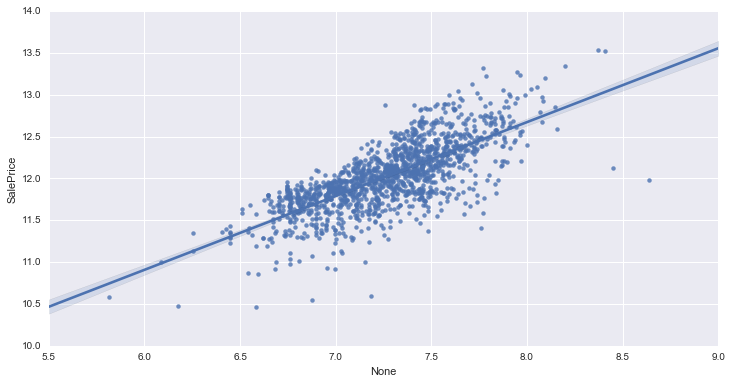

In [3]:
# Proposed feature: '1stFlrSF' + '2ndFlrSF' to give us combined Floor Square Footage
# but first, let's check how well it fares!
feat_trial = (train['1stFlrSF'] + train['2ndFlrSF']).copy()
print("Skewness of the original intended feature:",skew(feat_trial))
print("Skewness of transformed feature", skew(np.log1p(feat_trial)))

# hence, we'll use the transformed feature thank you very much!
feat_trial = np.log1p(feat_trial)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# seaborn's regression plot (I liked it a lot. hence it found it's way here!)
sns.regplot(x=(feat_trial), y=np.log1p(train['SalePrice']), data=train, order=1);


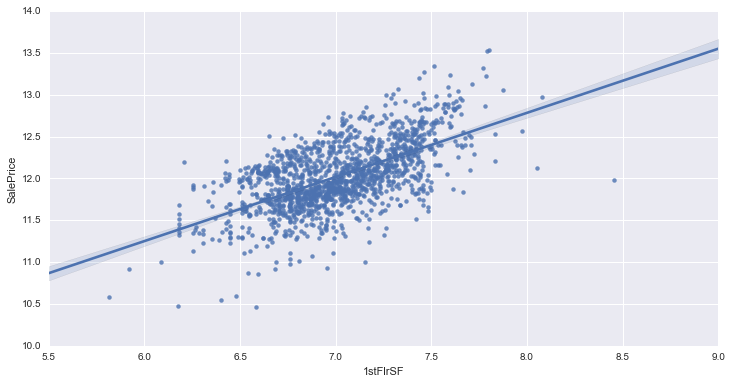

In [4]:
# transforming only 1stFlrSF
sns.regplot(x=np.log1p(train['1stFlrSF']), y=np.log1p(train['SalePrice']), data=train, order=1);

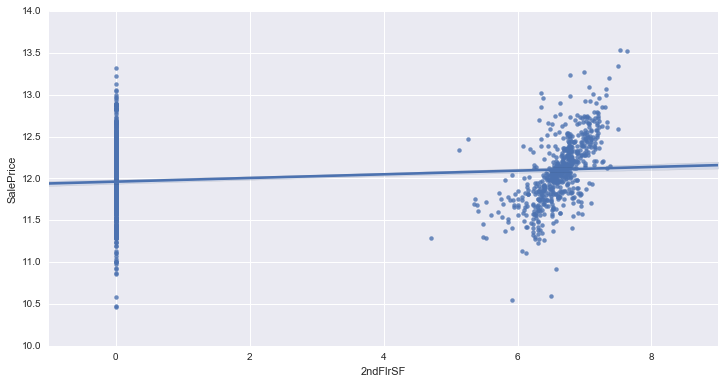

In [5]:
# transforming only 2ndFlrSF
sns.regplot(x=np.log1p(train['2ndFlrSF']), y=np.log1p(train['SalePrice']), data=train, order=1);

In [6]:
# lets create the feature then
train['1stFlr_2ndFlr_Sf'] = np.log1p(train['1stFlrSF'] + train['2ndFlrSF'])
test['1stFlr_2ndFlr_Sf'] = np.log1p(test['1stFlrSF'] + test['2ndFlrSF'])

('Skewness of the original intended feature:', 1.427345461344283)
('Skewness of transformed feature', 0.02289156955458256)


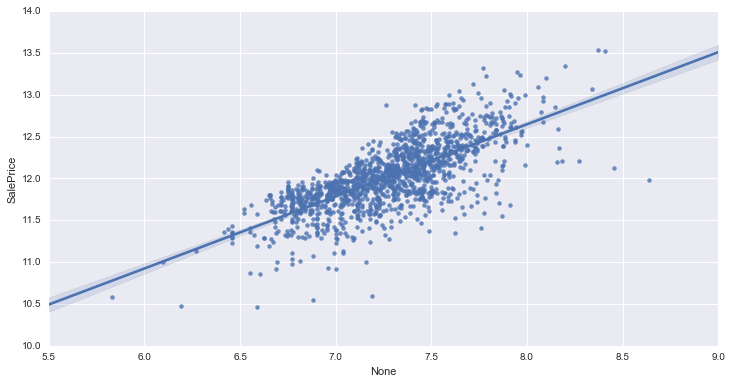

In [7]:
# Feature number 2 -> 1stflr+2ndflr+lowqualsf+GrLivArea = All_Liv_Area
feat_trial = (train['1stFlr_2ndFlr_Sf'] + train['LowQualFinSF'] + train['GrLivArea']).copy()
print("Skewness of the original intended feature:",skew(feat_trial))
print("Skewness of transformed feature", skew(np.log1p(feat_trial)))

# hence, we'll use the transformed feature thank you very much!
feat_trial = np.log1p(feat_trial)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# seaborn's regression plot (I liked it a lot. hence it found it's way here!)
sns.regplot(x=(feat_trial), y=np.log1p(train['SalePrice']), data=train, order=1);

In [8]:
train['All_Liv_SF'] = np.log1p(train['1stFlr_2ndFlr_Sf'] + train['LowQualFinSF'] + train['GrLivArea'])
test['All_Liv_SF'] = np.log1p(test['1stFlr_2ndFlr_Sf'] + test['LowQualFinSF'] + test['GrLivArea'])
del train['1stFlrSF']
del train['2ndFlrSF']
del train['1stFlr_2ndFlr_Sf']
del train['LowQualFinSF']
del train['GrLivArea']
del test['1stFlr_2ndFlr_Sf']
del test['LowQualFinSF']
del test['GrLivArea']

In [9]:
print("Some Statistics of the Housing Price:\n")
print(train['SalePrice'].describe())
print("\nThe median of the Housing Price is: ", train['SalePrice'].median(axis = 0))

Some Statistics of the Housing Price:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
('\nThe median of the Housing Price is: ', 163000.0)


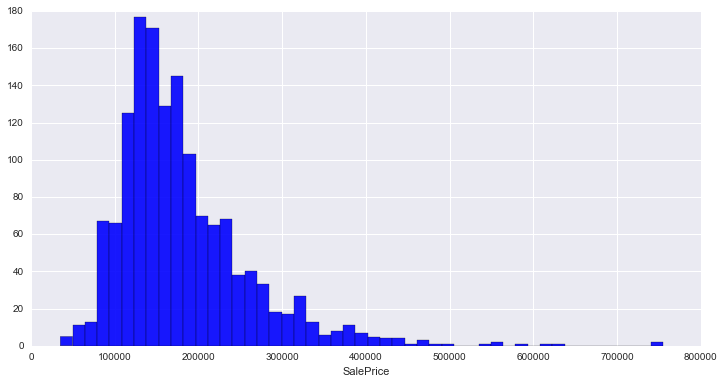

In [10]:
sns.distplot(train['SalePrice'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

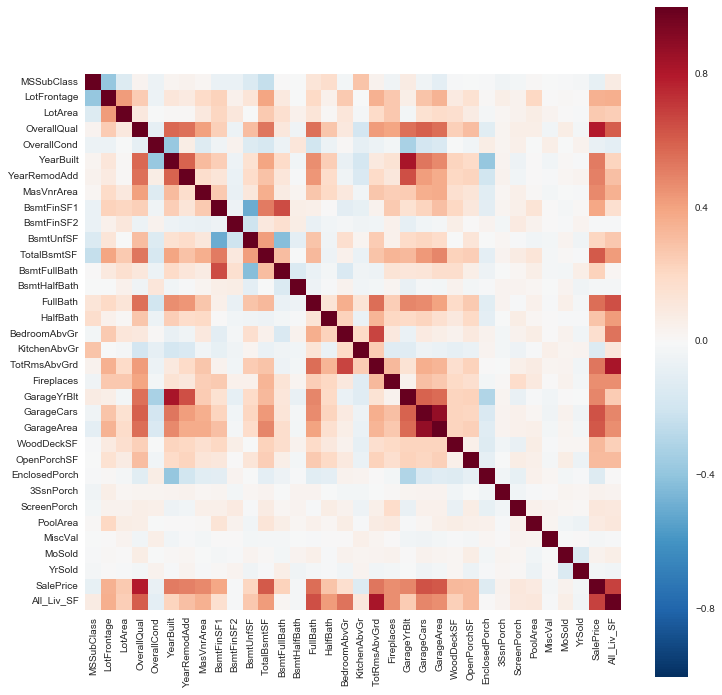

In [11]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [12]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.790981600584
All_Liv_SF: 	0.686532825793
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
GarageYrBlt: 	0.486361677488
MasVnrArea: 	0.477493047096
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
LotFrontage: 	0.351799096571
WoodDeckSF: 	0.324413444568
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
MSSubClass: 	-0.0842841351266
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
MiscVal: 	-0.0211895796403
BsmtHalfBath: 	-0.0168441542974
BsmtFinSF2:

# The housing price correlates
## OverallQual, All_Liv_SF, GrLivArea(GarageCars), GargeArea, TotalBsmtSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea and Fireplaces. 
## But some of those features are highly correlated among each others.

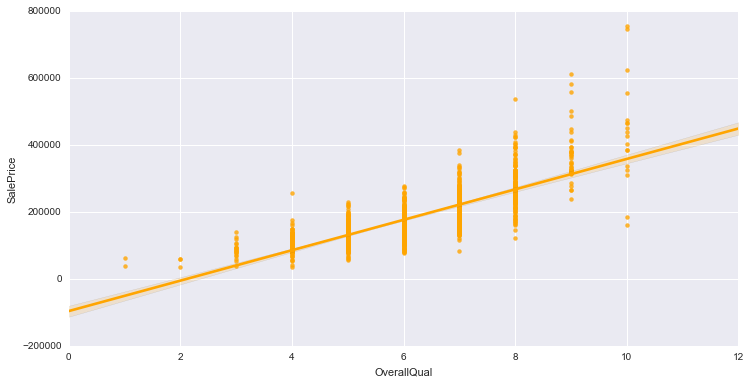

In [13]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = train, color = 'Orange')

### we can see as the overall qual increases , price also increases. positively related

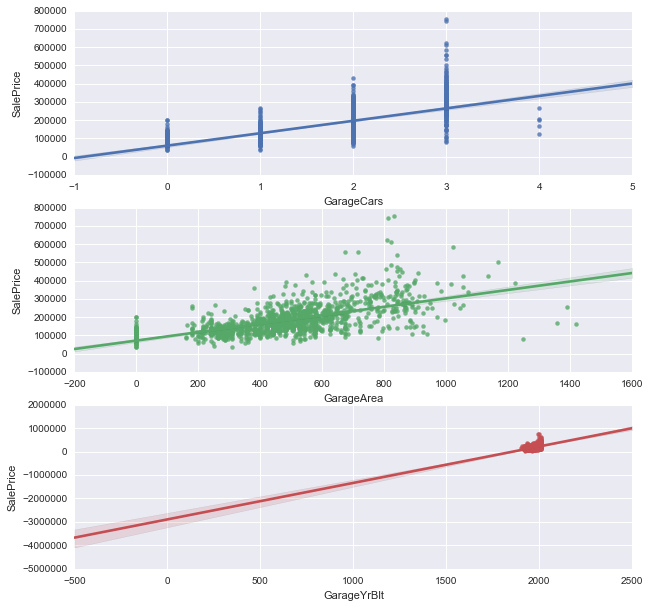

In [14]:
plt.figure(1)
fig, ax = plt.subplots(nrows=3)
fig.set_size_inches(10, 10)
sns.regplot(x="GarageCars",y="SalePrice", data=train,ax=ax[0]);
sns.regplot(x="GarageArea",y="SalePrice", data=train,ax=ax[1]);
sns.regplot(x="GarageYrBlt",y="SalePrice", data=train,ax=ax[2]);

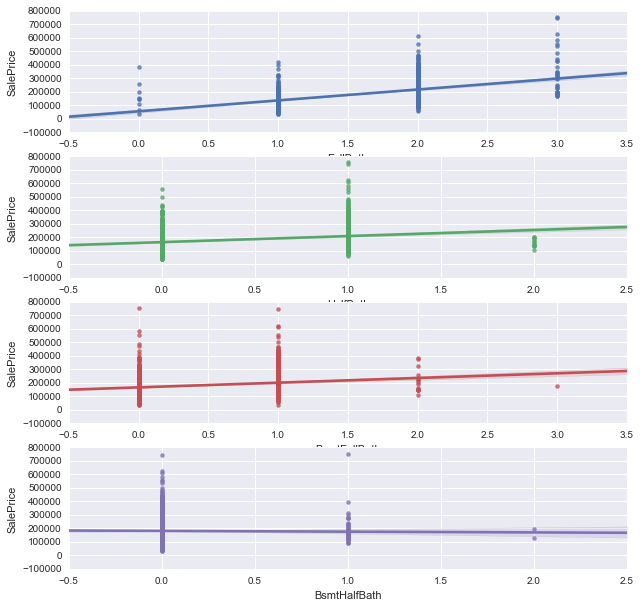

In [15]:
plt.figure(1)
fig, ax = plt.subplots(nrows=4)
fig.set_size_inches(10, 10)
sns.regplot(x="FullBath", y="SalePrice", data=train,ax=ax[0]);
sns.regplot(x="HalfBath", y="SalePrice", data=train,ax=ax[1]);
sns.regplot(x="BsmtFullBath", y="SalePrice", data=train,ax=ax[2]);
sns.regplot(x="BsmtHalfBath", y="SalePrice", data=train,ax=ax[3]);

## trying adding baths together
### looks like its not working

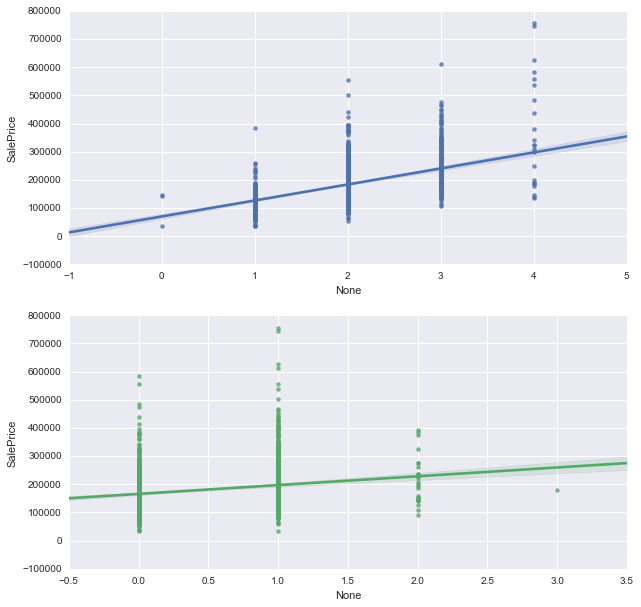

In [16]:
plt.figure(1)
fig, ax = plt.subplots(nrows=2)
fig.set_size_inches(10, 10)
full_half = (train['FullBath'] + train['HalfBath'])
Bsmt_full_half_bath = (train['BsmtFullBath'] + train['BsmtHalfBath'])
fig.set_size_inches(10, 10)
sns.regplot(x=full_half, y="SalePrice", data=train,ax=ax[0]);
sns.regplot(x=Bsmt_full_half_bath, y="SalePrice", data=train,ax=ax[1]);

### even merging year built features doesnt provide any improvement

('Skewness of the original intended feature:', -0.612830724202899)
('Skewness of the transformed feature:', 0.612830724202899)


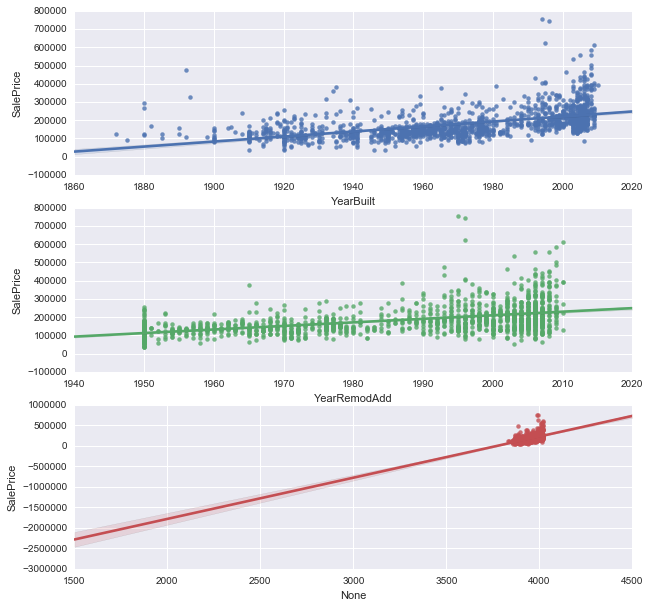

In [17]:
plt.figure(1)
fig, ax = plt.subplots(nrows=3)
fig.set_size_inches(10, 10)
sns.regplot(x="YearBuilt", y="SalePrice", data=train,ax=ax[0]);
sns.regplot(x="YearRemodAdd", y="SalePrice", data=train,ax=ax[1]);
print("Skewness of the original intended feature:",skew(train["YearBuilt"]))
print("Skewness of the transformed feature:",skew(np.invert(train["YearBuilt"]))) #not working
year_combined = train["YearBuilt"]+train["YearRemodAdd"]
sns.regplot(x=year_combined, y="SalePrice", data=train,ax=ax[2]);

# Lets work on categorical data

In [18]:
print(train.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


## Plotting box plots
* Neibhorhood

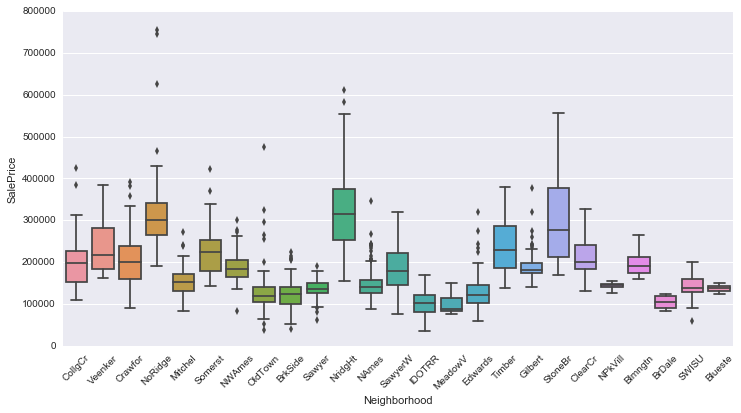

In [19]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

### From the above we see neibhorhood is indicative or related to sales prices. eg. StoneBR and NridgHT have higher median price

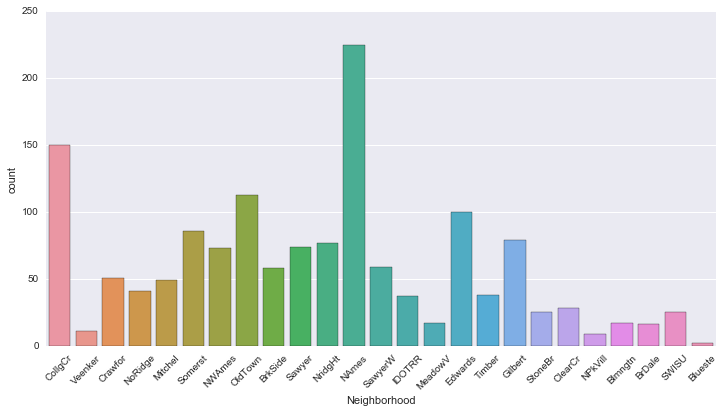

In [20]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = train)
xt = plt.xticks(rotation=45)

### We can group regions with similar prices into buckets to reduce dimension of this attribute

### Sales related attributes
* SalesType and condition
* Sales season

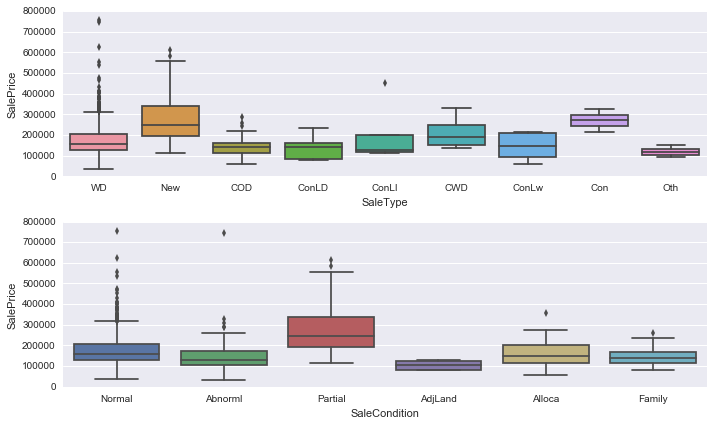

In [21]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train, ax = ax[1])
plt.tight_layout()

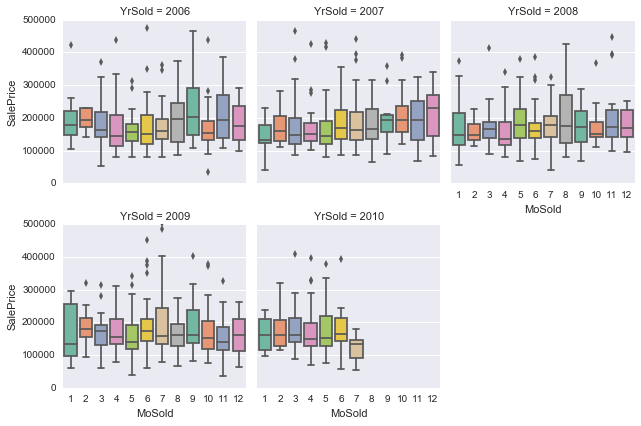

In [22]:
g = sns.FacetGrid(train, col = 'YrSold', col_wrap = 3)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout()

### Sale's timing does not seem to hugely affect the house.

### We now look at :
* Housing Style
* Building types

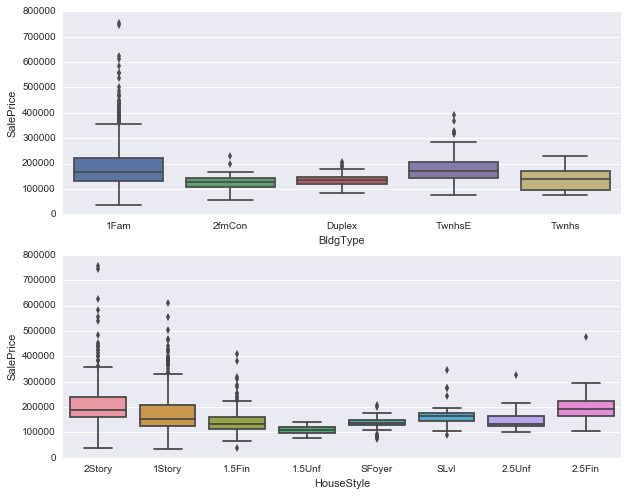

In [23]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = train, ax = ax[1])

### we can see that housing style and type has some relationship with prices.
* It may be useful to have them and test a bit on their correlation

### We look at Housing Condition

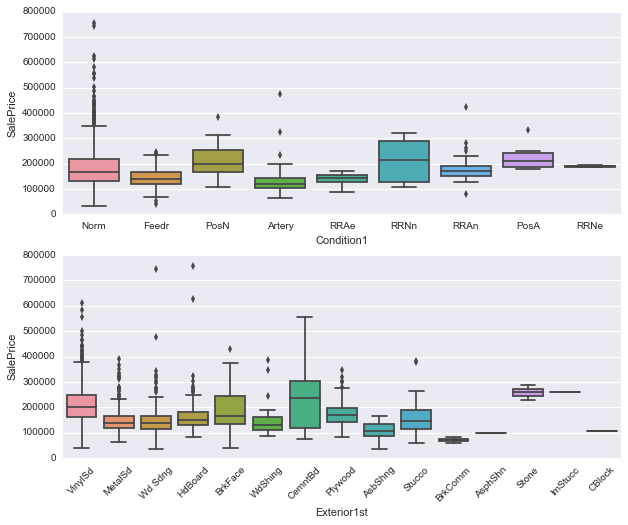

In [25]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = train, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

* Basement Conditions

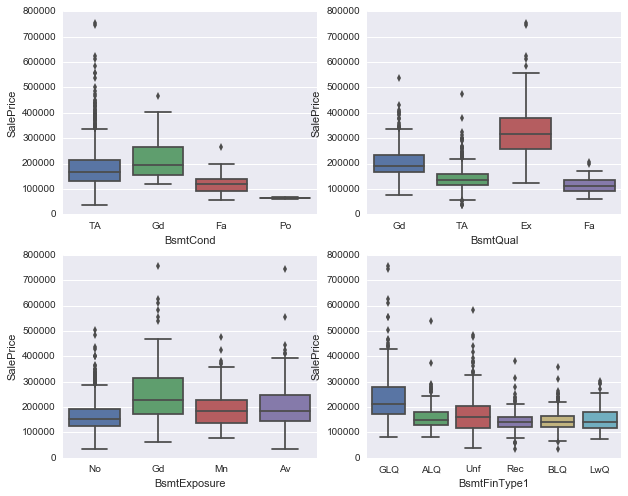

In [26]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = train, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = train, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = train, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = train, ax = ax[1, 1])

### We now look at fireplace realted attributes

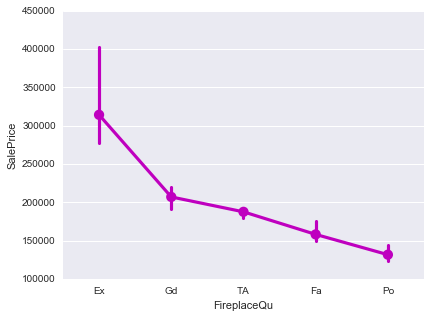

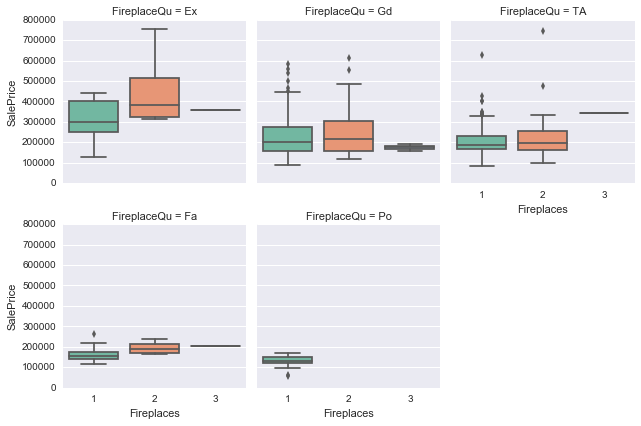

In [28]:
sns.factorplot('FireplaceQu', 'SalePrice', data = train, color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)
pd.crosstab(train.Fireplaces, train.FireplaceQu)
g = sns.FacetGrid(train, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

### quality of the fireplace actually determines the price. No of fireplaces doesnt contribute much to the price compared to quality of the fireplace

### We now look at heating

In [31]:
pd.crosstab(train.HeatingQC, train.FireplaceQu)


FireplaceQu,Ex,Fa,Gd,Po,TA
HeatingQC,,,,,
Ex,22,14,254,4,160
Fa,0,1,13,1,5
Gd,2,3,45,5,57
TA,0,15,68,10,91


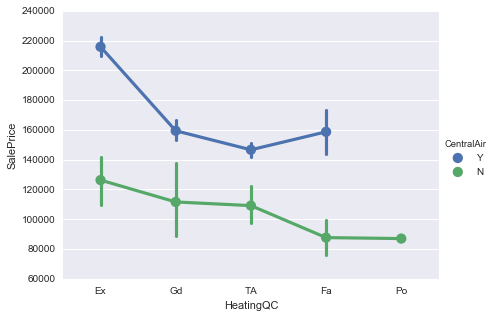

In [33]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = train, 
             size = 4.5, aspect = 1.4)

#### from the above we can infer that buildings with central air costs higher than no central air

* KITCHEN 

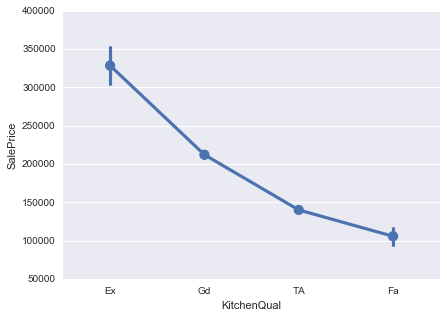

In [34]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = train, order = ['Ex', 'Gd', 'TA', 'Fa'])

Clearly kitchen quality is related to sales price of house

* MSZONING

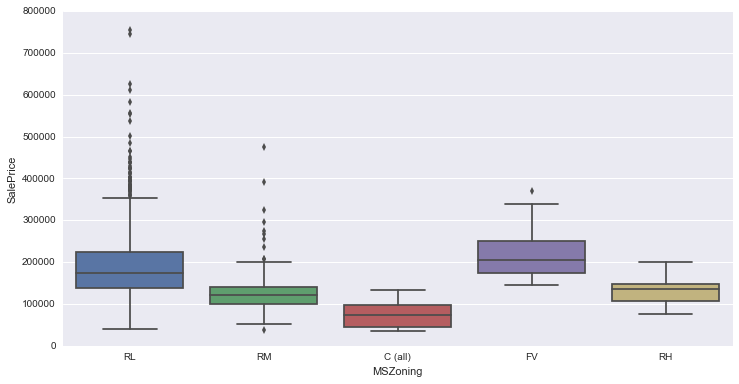

In [36]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = train)

### RL has lot of values which have corelations to other attributes in the dataset. Doing partial inter attribute correlation will help understand the relationship.
### But we can clearly see price is related to the zone value to some extent

* Street & Alley Access

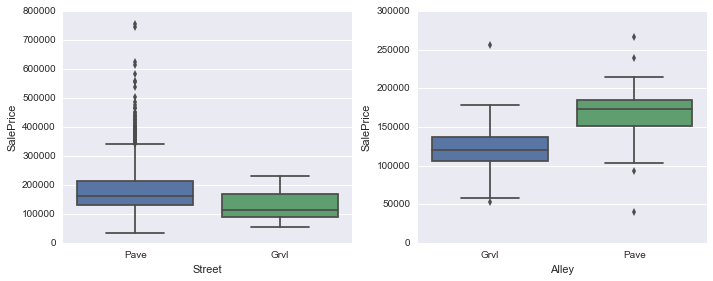

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = train, ax = ax[1])
plt.tight_layout()

### Again alley attribute shows good relationship with salesprice. unlike Street attribute.
#### Street can be eliminated for the first pass
#### But alley has NA's when street is pavement

In [84]:
print("The NA's in Alley is: ", train['Alley'].isnull().sum())
print("\nThere are so many NA's in Alley. When Alley is NA, Street = ", 
      train[train.Alley.notnull()].Street.unique())
# print("\n", pd.crosstab(train.Street, train.Alley))
pd.crosstab(train.Street, train.Alley)

("The NA's in Alley is: ", 1369)
("\nThere are so many NA's in Alley. When Alley is NA, Street = ", array(['Pave'], dtype=object))


Alley,Grvl,Pave
Street,,
Pave,50,41


# Summarizing the data exploration did by intuitively identifying which attributes are really important to predict house prices accurately. Lets do it for numeric and categorical seperately.

## Numeric
* 1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea are all skewed but influences house prices together. Hence we could group them to reduce dimensionality (All_Liv_SF)
* OverallQual is a key indicator for the house prices
* GarageCars and GarageArea have a positive relation with sales prices
* YearBuilt and YearRemodAdd can provide some effect on sales price (not much)

## Categorical
* neibhorhood is indicative or related to sales prices. eg. StoneBR and NridgHT have higher median price. We can group regions with similar prices into buckets to reduce dimension of this attribute 
* sales condition can be partial indicative of sales prices. eg. partial sales have higher house prices. Can be used
* Sale's timing does not seem to hugely affect the house.
* HouseStyle shows some indication of sales prices. But it doesnt provide enough info to be used all by itself like OveralQual
* FireplaceQu actually determines the price. "Fireplaces" doesnt contribute much to the price compared to quality of the fireplace
* CentralAir is a key indicator of price along with fireplace 
* KitchenQual is related to sales price of house
* price is related to the MSZoning to some extent 

### We can do more data exploration by using partial correlation between attributes to get more insights and group attributes

# Now next step we try to see if our findings are actually picked up feature selection models (randomforest and LassoReg) as important features.


## transformations before fitting feature selection models

In [90]:
x_col = train.columns.difference(['Id','SalePrice'])
x = train.loc[:,x_col]
numeric_cols = x.dtypes[x.dtypes != "object"].index
skewed_cols = x[numeric_cols].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_cols = skewed_cols[skewed_cols > 0.75]

skewed_cols = skewed_cols.index
print skewed_cols
x[skewed_cols] = np.log1p(x[skewed_cols])


Index([u'3SsnPorch', u'BsmtFinSF2', u'BsmtHalfBath', u'EnclosedPorch',
       u'KitchenAbvGr', u'MiscVal', u'PoolArea', u'ScreenPorch'],
      dtype='object')


In [132]:
# getting dummies for all features. You can go the LabelEncoder way, but this method
# is more sound (and easier!!!) in my opinion
train_data = pd.get_dummies(x)

# 3. filling NA's with the mean of the column:
x_train = train_data.fillna(train_data[:x.shape[0]].mean())


## Now we try to random forest for feature selection and see how much our independent analysis looks appropriate

In [115]:
from sklearn.ensemble import RandomForestRegressor

x_test = train['SalePrice']
rfr = RandomForestRegressor(n_estimators=3000,max_depth=250)
rfr.fit(x_train, x_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=250,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

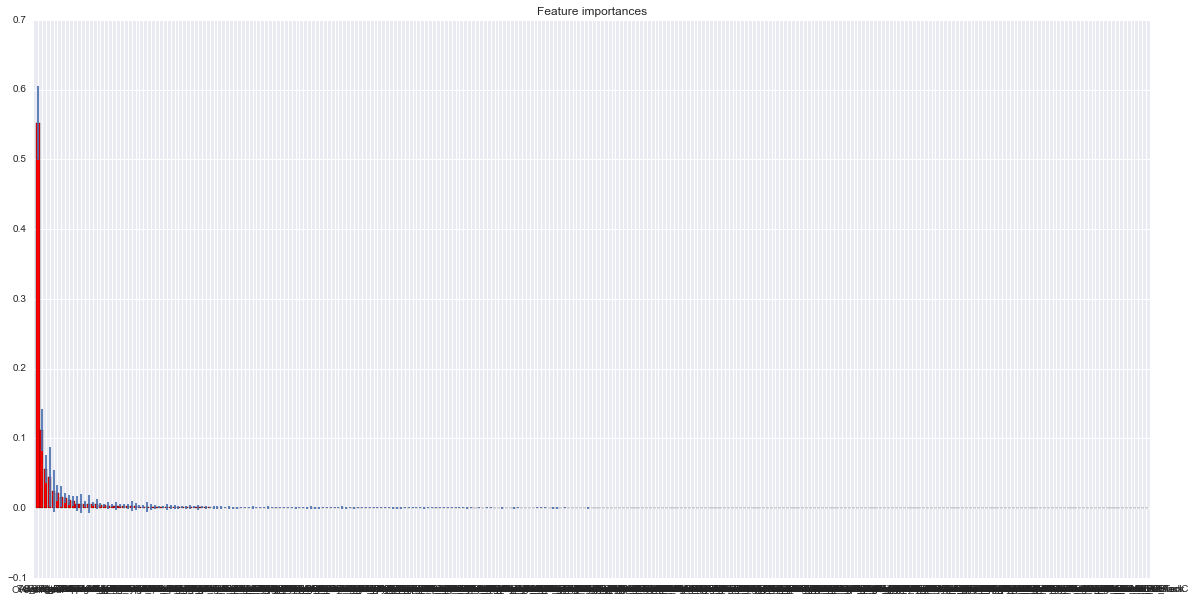

In [129]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
                 axis=0)
indices = np.argsort(importances)[::-1]

j = 0
important_x = pd.DataFrame(index=range(0, 1459), columns=['A'])
index = indices[j]
while j < importances.shape[0] and importances[index] > 0.0025:
    important_x = pd.concat([important_x, x_train.iloc[:, index]], axis=1)
    j += 1
    index = indices[j]
important_x.drop(['A'], axis=1, inplace=True)

plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices])
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [130]:
important_x.columns

Index([u'OverallQual', u'All_Liv_SF', u'TotalBsmtSF', u'GarageCars',
       u'GarageArea', u'BsmtFinSF1', u'YearBuilt', u'LotArea', u'OverallCond',
       u'YearRemodAdd', u'Fireplaces', u'CentralAir_Y', u'LotFrontage',
       u'CentralAir_N', u'BsmtUnfSF', u'MSZoning_RM', u'OpenPorchSF',
       u'GarageYrBlt', u'GarageType_Detchd', u'MoSold', u'MSZoning_C (all)',
       u'WoodDeckSF', u'MasVnrArea', u'TotRmsAbvGrd', u'FullBath',
       u'GarageType_Attchd'],
      dtype='object')

In [131]:
important_x

,OverallQual,All_Liv_SF,TotalBsmtSF,GarageCars,GarageArea,BsmtFinSF1,YearBuilt,LotArea,OverallCond,YearRemodAdd,...,OpenPorchSF,GarageYrBlt,GarageType_Detchd,MoSold,MSZoning_C (all),WoodDeckSF,MasVnrArea,TotRmsAbvGrd,FullBath,GarageType_Attchd
0,7,7.449175,6.753438,2,548,6.561031,2003,9.042040,5,2003,...,4.127134,2003.000000,0.0,2,0.0,0.000000,5.283204,8,2,1.0
1,6,7.146883,7.141245,2,460,6.886532,1976,9.169623,8,1976,...,0.000000,1976.000000,0.0,5,0.0,5.700444,0.000000,6,2,1.0
2,7,7.492475,6.825460,2,608,6.188264,2001,9.328212,5,2002,...,3.761200,2001.000000,0.0,9,0.0,0.000000,5.093750,6,2,1.0
3,7,7.453243,6.629363,3,642,5.379897,1915,9.164401,5,1970,...,3.583519,1998.000000,1.0,2,0.0,0.000000,0.000000,7,1,0.0
4,8,7.699252,7.044033,3,836,6.486161,2000,9.565284,5,2000,...,4.442651,2000.000000,0.0,12,0.0,5.262690,5.860786,9,2,1.0
5,5,7.222725,6.680855,2,480,6.597146,1993,9.555064,5,1995,...,3.433987,1993.000000,0.0,10,0.0,3.713572,0.000000,5,1,1.0
6,8,7.439815,7.430707,2,636,7.222566,2004,9.218804,5,2005,...,4.060443,2004.000000,0.0,8,0.0,5.545177,5.231109,7,2,1.0
7,7,7.649047,7.010312,2,484,6.756932,1973,9.247925,6,1973,...,5.323010,1973.000000,0.0,11,0.0,5.463832,5.484797,7,2,1.0
8,7,7.485762,6.859615,2,468,0.000000,1931,8.719481,5,1950,...,0.000000,1931.000000,1.0,4,0.0,4.510860,0.000000,8,2,0.0
9,5,6.989319,6.899723,1,205,6.747587,1939,8.912069,6,1950,...,1.609438,1939.000000,0.0,1,0.0,0.000000,0.000000,5,1,1.0
